# 📈 Linear Regression from Scratch

The purpose of this exercise is to implement a linear regression algorithm from scratch to get a good idea of how the math behind it works.

The general idea behind linear regression is to fit a line through a set of $m$ independent variables $[x_{1}, x_{2}, ..., x_{m}]$ to predict the independent variable $y$. While it only works well with data that is co-linear, it is really simple to fit, instantaneous to perform inferences, and completely transparent in explainability. These factors make linear regression an especially nice model to use when performing EDA in regression problems. It can give insights as to how the correlations with the data work, and run really quick fits and predictions for analysis on how various data predictions impact the correlation with the target variable.

For training our linear regression model, we'll be using the abalone dataset from kaggle (since that's what I have sitting in my current directory). If you're interested in getting this data, you can download it with the following command (assuming you've set up your ```~/.kaggle/kaggle.json)``` file):

```bash
kaggle competitions download -c playground-series-s4e4
```

## ⚙️ Initial Configuration

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🔎 EDA

Read the dataframe

In [138]:
df = pd.read_csv('./train.csv')
assert(df.shape[0] > 0 and df.shape[1] > 0)
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


To keep it simple we will use some of the most important features that aren't too co-linear

In [139]:
target = 'Rings'
features = [
    'Height',
    'Shell weight'
]

Showing the basic scatterplot of our features

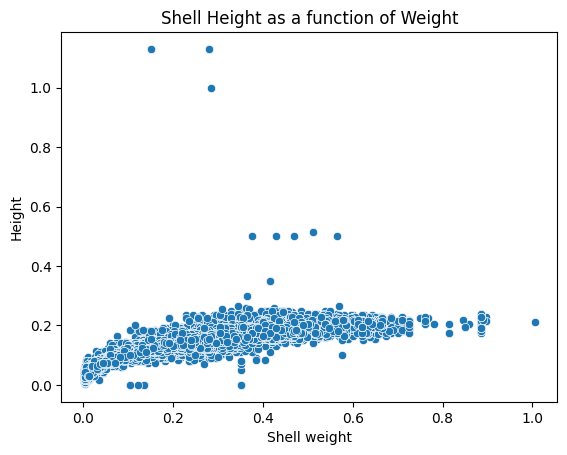

In [140]:
sns.scatterplot(data = df, x='Shell weight', y='Height')
plt.title("Shell Height as a function of Weight")
plt.show()

## Linear Regression Mathematics (2 Variables)

### Building Linear Regression from Two Variables

Finding the relationship between two variables:

$\beta_{1} = \sum_{i=0}^{n}{(x_{i}-\bar{x})(y_{i}-\bar{y})}$ $ /\sum_{i=0}^{n}{(x_{i}-\bar{x})^{2}}$

$\beta_{0} = \bar{y} - \beta_{1}\bar{x}$

In [141]:
b1 = sum((df['Shell weight'] - df['Shell weight'].mean()) * (df['Height'] - df['Height'].mean())) / sum((df['Shell weight'] - df['Shell weight'].mean())**2)
b0 = df['Height'].mean() - b1*df['Shell weight'].mean()

b0, b1

(0.0758515513857893, 0.26389143025941836)

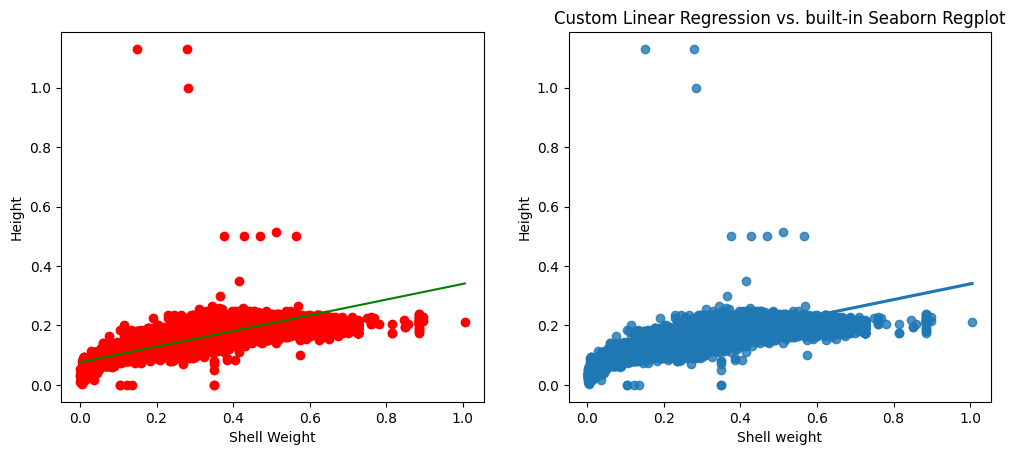

In [142]:
x_plot_vals = np.linspace(df['Shell weight'].min(), df['Shell weight'].max(), 1000)
regression_vals = b0 + b1 * x_plot_vals

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)

axes[0].plot(x_plot_vals, regression_vals, color='green', label='Linear Regression')
axes[0].scatter(df['Shell weight'], df['Height'], color='red', label='Data Values')
axes[0].set_xlabel("Shell Weight")
axes[0].set_ylabel("Height")

sns.regplot(data=df, x='Shell weight', y='Height', ax=axes[1])
plt.title("Custom Linear Regression vs. built-in Seaborn Regplot")
plt.show()

### Linear Regression Error Function: RMSE

$RMSE = \sqrt{1/n\sum_{i=0}^{n}{(y_{i}-\hat{y_{i}})^{2}}}$

In [143]:
def rmse(actual, pred):
    return np.sqrt(sum((actual - pred)**2)/len(actual))

In [144]:
rmse(df['Height'][:], b0 + b1 * df['Shell weight'][:])

0.016247878015324485

### R-Squared

To measure the accuracy of a linear model, mathematically, one calculates the $R^{2}$ value:

$R^{2} = $ $SSR\over{SST}$ = $\sum{(\hat{y}-\bar{y})^{2}}\over\sum{(y_{i}-\bar{y})^{2}}$

* SSR is the total sum of squares residuals
* SST is the total sum os squares

In [145]:
def r_squared(actual, pred):
    return sum((pred - actual.mean())**2) / sum((actual - actual.mean())**2)

We will get ~```.8172``` for our R-Squared result

In [146]:
r_squared(df['Height'][:], b0 + b1 * df['Shell weight'][:])

0.8172497177941768

## Multivariable Linear Regression

For multiple linear regression you have the equation:

$y = w_{1}x_{1} + w_{2}x_{2} + ... + w_{m}x_{m} + b$

Usually the bias term is considered to just be the first value of the weight vector and $x_{0}$ is set to 1

$y = w_{0} + w_{1}x_{1} + ... + w_{m}x_{m}$

$y = WX$

In [147]:
class CustomLinearRegression:

    # The learning rate can affect finding a local vs global minimum in gradient descent
    def __init__(self,
                 lr: int = 0.01,
                 n_iters:int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # Gets the dot product of the observations and the weights with the bias
    def pred(self, vals):
        return np.dot(vals.values, self.weights) + self.bias

    def fit(self, X, y):
        # If there are m features this will be the number of columns in a dataframe
        self.weights = np.random.rand(X.shape[1])
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = self.pred(X)
            # Calculate the partial derivatives for the weight vector and bias term
            dw = (1 / len(X)) * np.dot(X.T, y_pred - y)
            db = (1 / len(X)) * np.sum(y_pred - y)
            # Update the weights and bias with each iteration
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db


lr = CustomLinearRegression()
lr.fit(df[features], df[target])

In [148]:
len(df['Shell weight'].shape)

1

#### Custom Linear Regression on Two Features

Look at some of the predicted values $\hat{y}$ for the number of rings abalone have (note we aren't rounding them as the real applications would require)

In [149]:
lr.pred(df[features][:10])

array([ 9.84453904, 10.17007715,  8.53229422,  9.88682404,  9.61386021,
       10.18515886,  9.27746889, 10.07710654,  8.59166239,  9.52711957])

Here we can see the actual values $y_{i}$

In [150]:
df[target][:10].values

array([11, 11,  6, 10,  9, 10,  9,  9,  4,  8])

Here can check out the final weight vector $w$ and bias term $b$. This is one of the nicer features of Linear Regression models is they are entirely transparent with their output.

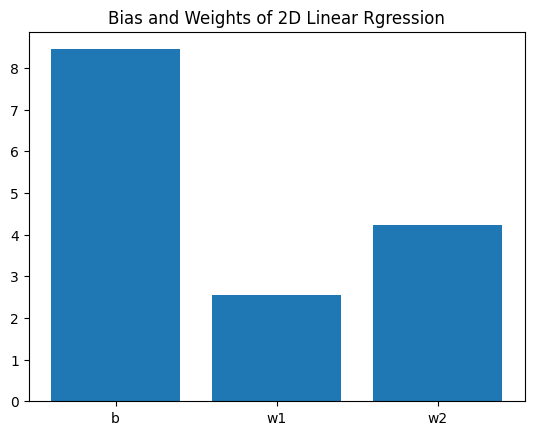

In [151]:
plt.bar(["b", "w1", "w2"], pd.concat((pd.Series([lr.bias]), pd.Series(lr.weights))))
plt.title("Bias and Weights of 2D Linear Rgression")
plt.show()

#### Custom Linear Regression on More Features

If we make model fit with all the numerical features and fit it, we can see an improvement in the RMSE of ```2.4684``` vs the one with just the two most important features scoring ```2.7461```. We note I'm not doing anything crazy for the encodable features at the moment - they could also add some value to the predictions.

In [152]:
new_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

lr_full_features = CustomLinearRegression()
lr_full_features.fit(df[new_features], df[target])
rmse(df[target], lr_full_features.pred(df[new_features]))

2.45233519785437

In [153]:
lr_full_features.pred(df[new_features][:10])

array([ 9.76485808, 11.35732441,  5.27781361, 10.44627807,  9.71885307,
       11.53859398,  7.65097118, 11.26469427,  5.57768591,  9.34180343])

We note that since scaling wasn't performed on the features, interpretability of the weights is lacking a bit.

In [154]:
lr_full_features.weights, lr_full_features.bias

(array([2.120933  , 2.63246878, 0.86485082, 2.67475149, 0.42326145,
        0.77665562, 1.93114773]),
 4.556788072256938)

#### MSE (Multivariable Linear Regression)

Since $\hat{y}_{i} = wx_{i}+b$ per the linear regression line equation, we can plug this value into MSE to get:

$MSE = J(w,b) = $ $1\over{n}$ $\sum_{i=i}^{n}{(y_{i} - (wx_{i} + b))^{2}}$

The values are squared for $y_{i} - (wx_{i} + b)$ becuse we don't care whether the error for a prediction is higher or lower than our actual value. This penalizes larger differences between targets and predictions, as higher differences being squared will contribute more heavily to the loss that is calculated.